In [172]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from datetime import date
import plotly.graph_objects as go
import plotly.express as px
import requests
import io
%matplotlib inline

In [115]:
 # Set the file paths to the CSVs
gold_csv_url = "https://raw.githubusercontent.com/rmit-s3607407-Tony-Huang/Fintech_Project1/dev-risk-analysis/gold_data_for_backtrader.csv"
btc_csv_url = "https://raw.githubusercontent.com/rmit-s3607407-Tony-Huang/Fintech_Project1/staging-branch/data/BTCUSDT.csv"
sp500_csv_url = "https://raw.githubusercontent.com/rmit-s3607407-Tony-Huang/Fintech_Project1/dev-risk-analysis/SP500_Data.csv"

In [121]:
# Read the ice cream sales data, set the `date` as the index
gold_df = pd.read_csv(gold_csv_url)
btc_df = pd.read_csv(btc_csv_url, header=None)
sp500_df = pd.read_csv(sp500_csv_url)

In [145]:
btc_df.columns = ['Date','Open','High','Low','Close','Volume','Open Interest']
btc_close = btc_df.drop(columns=['Open','High','Low','Volume','Open Interest'])
btc_close.set_index('Date', inplace=True)
btc_close.index = pd.to_datetime(btc_close.index, format='%Y-%m-%d')
btc_close

,Close
Date,
2017-09-01,4834.91
2017-09-02,4472.14
2017-09-03,4509.08
2017-09-04,4100.11
2017-09-05,4366.47
...,...
2021-09-23,44865.26
2021-09-24,42810.57
2021-09-25,42670.64


In [147]:
gold_close = gold_df.drop(columns=['Open','High','Low','Volume','Open Interest'])
gold_close.set_index('Date', inplace=True)
gold_close.index = pd.to_datetime(gold_close.index, format='%Y-%m-%d') - pd.Timedelta(seconds=1)
gold_close

,Close
Date,
2016-01-04,1075.2
2016-01-05,1078.4
2016-01-06,1091.9
2016-01-07,1107.8
2016-01-08,1097.9
...,...
2021-09-20,1763.8
2021-09-21,1778.2
2021-09-22,1778.8


In [146]:
sp500_df.columns = ['Date','Open','High','Low','Close','Volume', 'Interest']
sp500_close = sp500_df.drop(columns=['Open','High','Low','Volume','Interest'])
sp500_close.set_index('Date', inplace=True)
sp500_close.index = pd.to_datetime(sp500_close.index, format='%Y-%m-%d')
sp500_close

,Close
Date,
2016-01-04,2012.660034
2016-01-05,2016.709961
2016-01-06,1990.260010
2016-01-07,1943.089966
2016-01-08,1922.030029
...,...
2021-09-21,4354.189941
2021-09-22,4395.640137
2021-09-23,4448.979980


In [152]:
combined_close = pd.concat([sp500_close, btc_close, gold_close], axis=1)
combined_close = combined_close.dropna()
combined_close.columns=['SP500 Close','BTC Close', 'Gold Close']
combined_close

,SP500 Close,BTC Close,Gold Close
Date,,,
2017-09-01,2476.550049,4834.91,1330.4
2017-09-05,2457.850098,4366.47,1344.5
2017-09-06,2465.540039,4619.77,1339.0
2017-09-07,2465.100098,4691.61,1350.3
2017-09-08,2461.429932,4282.80,1351.2
...,...,...,...
2021-09-20,4357.729980,43015.62,1763.8
2021-09-21,4354.189941,40734.38,1778.2
2021-09-22,4395.640137,43543.61,1778.8


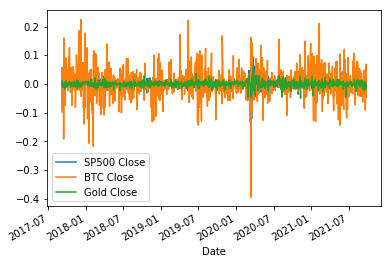

In [154]:
# Using the `pct_change` function to calculate the daily returns for SP500, BTC, and Gold
daily_returns = combined_close.pct_change()
daily_returns.plot()

In [155]:
#Calculating Correlation of daily returns
correlation = daily_returns.corr()
correlation

,SP500 Close,BTC Close,Gold Close
SP500 Close,1.000000,0.203708,0.088709
BTC Close,0.203708,1.000000,0.103288
Gold Close,0.088709,0.103288,1.000000


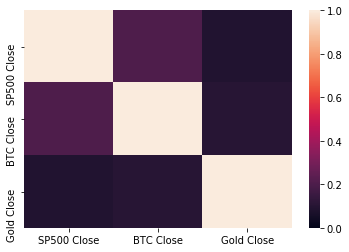

In [157]:
#'heatmap' function used to visualize correlations
sns.heatmap(correlation, vmin=0, vmax=1)

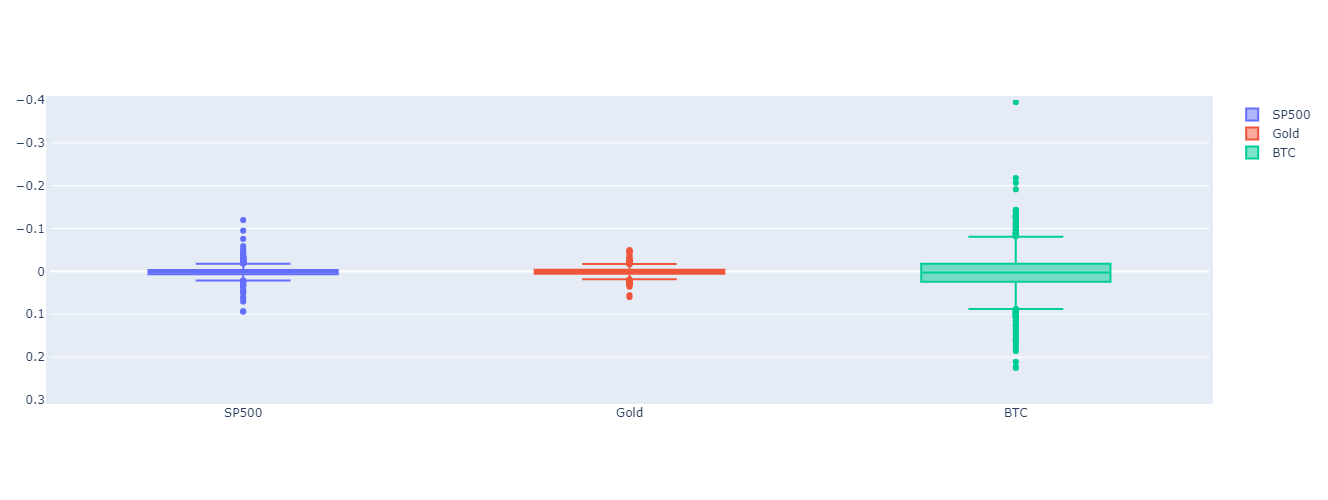

In [188]:
fig = go.Figure()
fig.add_trace(go.Box(y=daily_returns['SP500 Close'], name="SP500"))
fig.add_trace(go.Box(y=daily_returns['Gold Close'], name="Gold"))
fig.add_trace(go.Box(y=daily_returns['BTC Close'], name="BTC"))
fig.update_layout(yaxis=dict(range=[.3,-.4]), autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
))

fig.show()